In [229]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [230]:
yolo = cv2.dnn.readNet("./yolov3.weights","./yolov3.cfg")

In [231]:
classes = []
with open("./yolov3.txt",'r') as f:
    classes = f.read().split('\n')
classes[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [232]:
image = cv2.imread('./dog.jpeg')

In [233]:
(height,width) = image.shape[:2]
print(height,width)

576 768


In [234]:
blob = cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)
blob.shape

(1, 3, 320, 320)

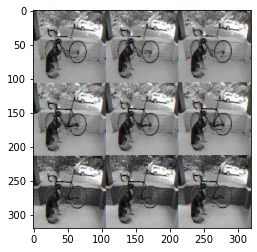

In [235]:
plt.imshow(blob[0].reshape(320,320,3))

In [236]:
yolo.setInput(blob)
layer_outputs = yolo.forward(yolo.getUnconnectedOutLayersNames())

In [237]:
boxes = []
confidences = []
class_ids = []
conf_threshold = 0.5
nms_threshold = 0.4
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = center_x-w/2
            y = center_y-h/2
                # update our list of bounding box coordinates,
                # confidences, and class IDs
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [238]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [239]:
Font = cv2.FONT_HERSHEY_PLAIN
Color = np.random.uniform(0,255,size=(len(boxes),3))

In [250]:
for i in indices.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = Color[i]
    x,y = int(x),int(y)
    
    cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
    cv2.putText(image,label+" "+confi,(x,y+20),Font,2,color,2)

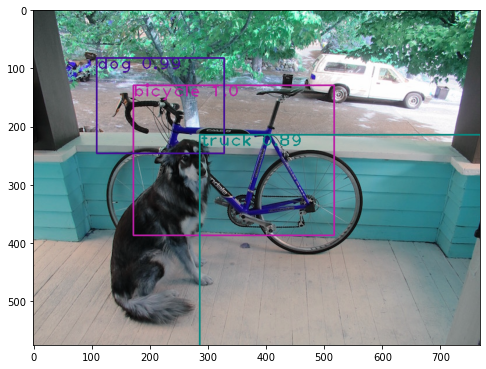

In [251]:
plt.figure(figsize=(8,8))
plt.imshow(image)